In [ ]:
# 입력과 출력이 시퀀스 단위로 처리
# 개체명 인식에 대한 내용을 LSTM으로 할 수 있음
# RNN 공부는 LSTM을 공부하는 것과 비슷하다고 볼 수 있음

In [ ]:
"""
model.add(SimpleRNN(hidden_units)) 여기서 hidden_units도 2^n으로 입력해주는 것이 일반적임
hidden_units=히든 상태의 크기(rnn의 출력)
timesteps=입력 시퀀스의 길이(input_length)
input_dim=입력의 차원(주가 예측 예시에서는 1차원)
다음 단어 예측에서는 (단어 전체 개수)차원

ex) 주가 예측하고 싶음. 그렇다면 며칠치의 데이터를 통해서 예측할 것인지를 봐야함
10일간 주가 데이터로 다음날 주가 예측하고 싶음
그렇다면 어제 데이터를 예측하고 싶다면 최근 10일의 데이터를 이용하여 계산해야되고
오늘 것을 예측하고 싶다면 어제까지 예측된 데이터와 최근의 데이터를 이용하여 계산하는 방식임
그럼 내일 주가 예측도 오늘까지의 예측 결과를 포함한 최근 10일의 데이터를 이용하여 계산하는 것임
이를 슬라이딩 윈도우 방식이라고 함

            오늘
rnn(lstm) cells
10,9,8,...,2,1
그럼 위의 구조는 몇대몇의 구조일까? = n:1의 구조임. 그리고 이와 같은 경우는 steps가 10이라고 할 수 있음(10일치의 데이터)

문장 입력 -> 다음 단어 예측

rnn(lstm) cells
나는 지금 rnn 공부를

코퍼스를 구성하는 단어 종류: 1000개 => 1000차원

"""

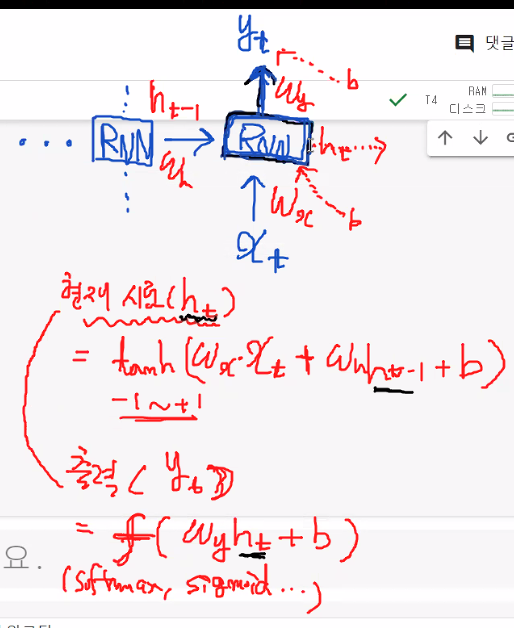

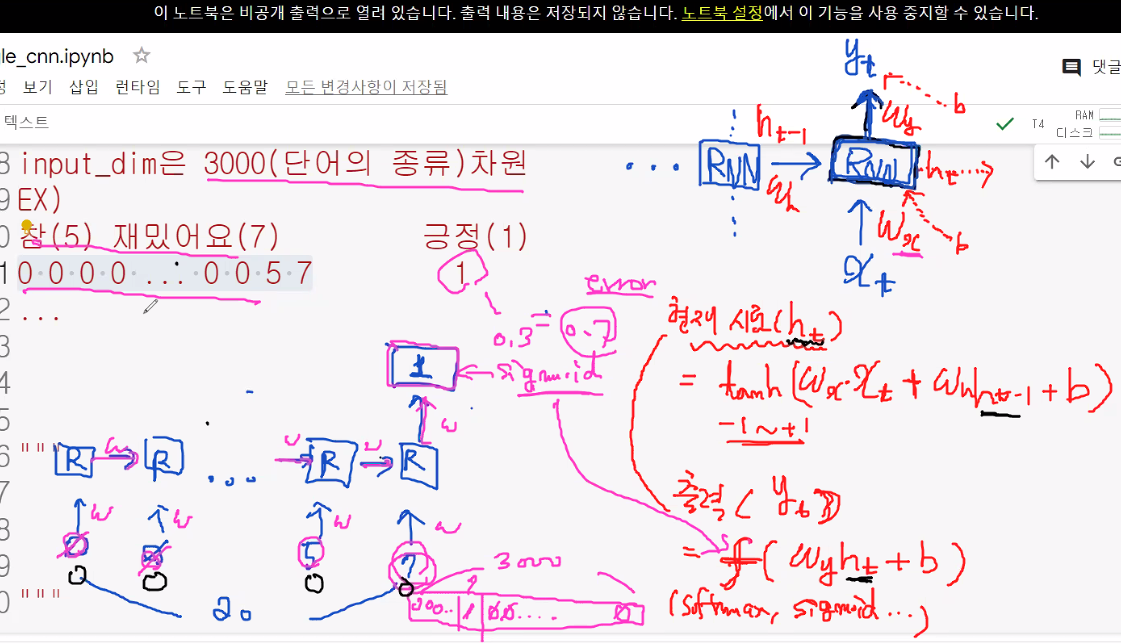

아래는 강사님작성

In [ ]:
"""
model.add(SimpleRNN(hidden_units))
hidden_units=히든 상태의 크기(rnn 출력)
timesteps=입력 시퀀스의 길이(input_length, 시점의 수)
input_dim=입력의 차원(주가예측 예시에서는 1차원,
다음 단어 예측 예시에서는 (전체 단어의 개수)차원)
ex) 
10일간 주가 데이터 -> 다음 날 주가 예측
            오늘
 rnn(lstm) cells        
10 9 8 ... 2 1
문장 입력 -> 다음 단어 예측
             합니다
 rnn(lstm) cells        
나는 지금 rnn 공부를
코퍼스를 구성하는 단어 종류: 1000개
=> 1000차원
ex) 나는(index번호가 3번이라면)
0001000...000
<- 길이 1000 ->
model.add(SimpleRNN(hidden_units, input_shape=(timesteps, input_dim)))
model.add(SimpleRNN(hidden_units, input_length=M, input_dim=N)))
위 두가지는 같은 표현임
M에는 timesteps, N에는 input_dim을 기술함
질문: 패딩을 최대 길이로 맞춰야 하니 input_dim과 timesteps가 같은 숫자가 아닌가?
대답: 아님. 전체 단어가 1만개여서 최대 1만개까지 늘린다면 공간의 비효율이 심하므로 적당히 자를 필요가 있음
이에 따라 패딩을 했을 때의 길이가 timesteps라고 볼 수 있음


모델: 영화 리뷰 감성(긍/부) 분석기 제작
5천개 리뷰(문장), 라벨(긍정/부정)
전체 문장을 구성하는 단어의 종류 : 3000개
가장 긴 문장의 길이 : 500
가장 짧은 문장 길이 : 1
평균 문장의 길이 : 10
패딩 문장의 길이 : 20으로 설정(=모든 문장의 길이를 20으로 만듦. 20이 안되면 인코딩했을 때 앞을 전부 0으로 채움)
이에 따라 모든 5000개의 문장의 길이는 20으로 맞춰짐(앞에서 20개의 단어만 살아남는 것임)

ex) 참(5) 재밌어요(7)      긍정(1)
0 0 0 0 0 ... 0 0 5 7       1
위의 길이는 몇일까? = 20임. 이는 timesteps임
그럼 단어 3000개는 무엇일까? = input_dim임
하나의 문장 사이즈는 어떻게 표현하나? = 배치사이즈라고 함
return_sequences = n:1일 경우 False(마지막만 출력), true일 경우 모든 시퀀스를 반환
"""

https://keras.io/api/layers/recurrent_layers/simple_rnn/

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

In [4]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10))) 
# 안에 return_sequences가 false로 설정되어 있음
model.summary()
# model.add(SimpleRNN(hidden_units, input_shape=(timesteps, input_dim)))
# model.add(SimpleRNN(hidden_units, input_length=M, input_dim=N)))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10))) 
# 한번에 8개가 올라감
# batch_size=8, timesteps=2, input_dim=10
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (8, 3)                    42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


위 모델에 대한 그림
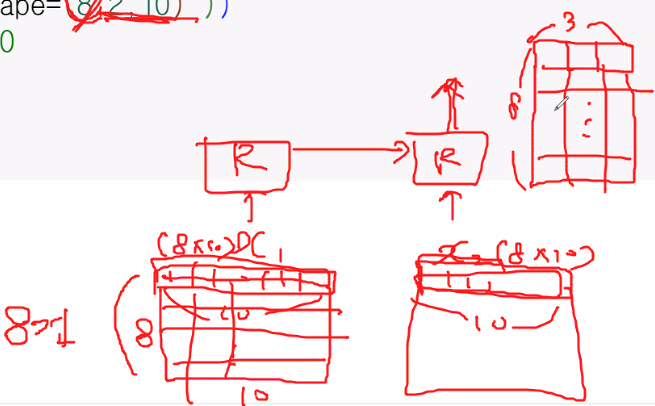


https://velog.io/@pkh96/9.-%EB%94%A5%EB%9F%AC%EB%8B%9D-%EC%A3%BC%EA%B0%80-%EC%98%88%EC%B8%A1

https://wikidocs.net/22886(이건 공부용)

https://wikidocs.net/173005
해당 주소 참고

In [ ]:
# !pip install -U finance-datareader

In [7]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df=fdr.DataReader('005930', '2015-01-01', '2024-07-03')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,26799,26799,26540,26600,175499,0.002261
2015-01-05,26720,26720,26260,26660,202790,0.002256
2015-01-06,26300,26340,25760,25900,304710,-0.028507
2015-01-07,25880,26220,25640,26140,286455,0.009266
2015-01-08,26780,26780,26199,26280,289552,0.005356


df.Close.plot()

In [14]:
def MinMaxScaler(data): # 직접 구현
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [18]:
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)

In [19]:
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx.head()

,Open,High,Low,Volume
Date,,,,
2015-01-02,0.296777,0.276849,0.296536,0.001943
2015-01-05,0.295903,0.276033,0.293408,0.002246
2015-01-06,0.291251,0.272107,0.287821,0.003374
2015-01-07,0.286600,0.270868,0.286480,0.003172
2015-01-08,0.296567,0.276653,0.292726,0.003206


In [20]:
dfx.describe()

,Open,High,Low,Volume
count,2338.000000,2338.000000,2338.000000,2338.000000
mean,0.583529,0.549303,0.583149,0.114668
std,0.197963,0.185875,0.198007,0.108542
min,0.000000,0.000000,0.000000,0.000000
25%,0.458056,0.432335,0.459218,0.002938
50%,0.566999,0.534814,0.565698,0.116372
75%,0.753045,0.709711,0.755028,0.173838
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
# 지난 30일간의 데이터로 오늘의 주가를 예측
# 5월 말(25일로 가정) ~ 7월 3일까지 30일간의 삼성전자 주가 데이터로 7월 4일 종가 예측
# 5월 26일 ~ 7월 4일까지 30일간의 삼성전자 주가 데이터로 7월 5일 종가 예측
# 5월 27일 ~ 7월 5일까지 30일간의 삼성전자 주가 데이터로 7월 6일 종가 예측
#  ... 이런 식으로 예측이 되어야 하므로 난이도가 높아지고 한번만 예측이 틀려도 연속으로 틀릴 가능성이 높아짐

In [21]:
X = dfx.values.tolist()
y = dfy.values.tolist()

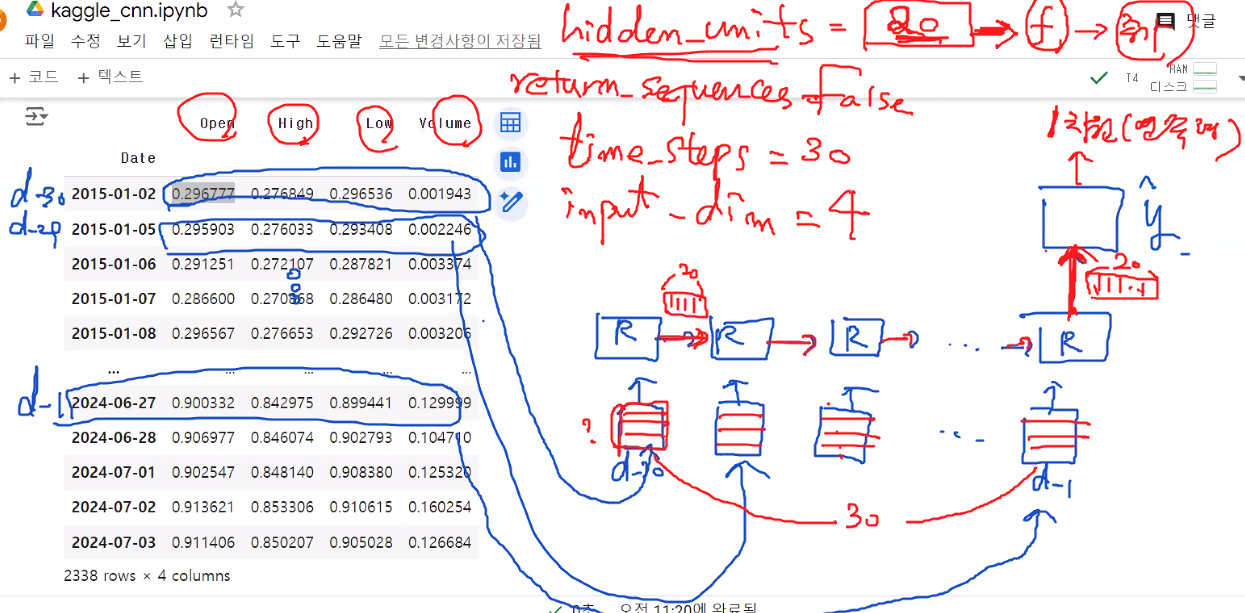

여기서 units는 직접 정해주는데 임의로 20으로 설정

r에서 r로 넘어갈 때도 units 개수와 동일하게 전달

한개의 R에서만 출력하므로 return_sequences=False로 설정되어 있는 상태임

최종출력은 활성함수는 linear로 출력하게 됨

In [22]:
window_size = 30

data_X = []
data_y = []
for i in range(len(y) - window_size): # 2338 - 30
    _X = X[i : i + window_size] # 30일간 주가 데이터(1월1일~1월30일)
    _y = y[i + window_size]    # 31일째의 종가 데이터(1월 31일)
    data_X.append(_X) # 30일간 주가 데이터 단위로 data_X에 저장
    data_y.append(_y) # 다음날의 종가 데이터가 data_y에 저장
print(_X, "->", _y)

[[0.869324473974674, 0.8161157024784957, 0.8737430167588003, 0.1516018444674054], [0.8648947951263954, 0.8130165289247799, 0.8636871508370239, 0.21617021834508593], [0.8604651162781168, 0.8171487603297344, 0.8614525139655179, 0.20738434094048713], [0.85049833886949, 0.7954545454537237, 0.8458100558649767, 0.30885238337572374], [0.8338870431884453, 0.807851239668587, 0.8268156424571768, 0.4852957289953704], [0.8471760797332811, 0.8057851239661097, 0.8513966480437415, 0.20529129474720184], [0.8604651162781168, 0.807851239668587, 0.840223463686212, 0.3349147976887557], [0.8283499446280971, 0.7768595041314289, 0.821229050278412, 0.31616079816998527], [0.8250276854918881, 0.7716942148752358, 0.821229050278412, 0.29011056464055573], [0.8239202657798185, 0.7892561983462921, 0.8290502793286826, 0.1739224106452871], [0.8294573643401667, 0.7861570247925763, 0.8368715083789532, 0.1561139389169357], [0.8637873754143258, 0.8057851239661097, 0.8581005586582591, 0.25665982959283035], [0.8682170542626

In [26]:
len(y)

2338

In [24]:
len(data_X)

2308

In [25]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (1615, 30, 4) (1615, 1)
테스트 데이터의 크기 : (693, 30, 4) (693, 1)


In [ ]:
# 2338건 주가 데이터 -> 2308개의 훈련 데이터 -0> 7:3 비율로 나눔
# 훈련 데이터의 크기 : (1615,30,4  (=hidden_units, input_length=M, input_dim=N)) (1615,1)
# 테스트 데이터의 크기 : (693,30,4) (693,1)

# (1615,30,4)를 x데이터로, (1615,1)를  y데이터로 하여 훈련 진행
# => model => model로 (693,30,4) 데이터를 예측했을 때, (693,1)과 비교하여 모델에 대한 성능 평가

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 위는 간단히 보자면 위 라이브러리를 사용한 데이터 분할을 의미한 설명이라고 보면됨
# 다만 다른 것은 시계열 데이터를 랜덤 추출해서 학습데이터로 사용하면 절대 안됨

In [28]:
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [29]:
model = Sequential()

In [30]:
model.add(LSTM(units=20, return_sequences=False, input_shape=(30, 4)))
model.add(Dense(1)) # 연속형 값은 linear(기본값), boolean은 sigmoid, softmax 등

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                2000      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 2,021
Trainable params: 2,021
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='adam', loss='mean_squared_error') # 연속형 예측이기 때문에 mse를 사용함. 분류였으면 바이너리, 카테고리컬 등을 사용함
model.fit(train_X, train_y, epochs=70, batch_size=40)
pred_y = model.predict(test_X)

Epoch 1/70
41/41 [==============================] - 18s 11ms/step - loss: 0.0165
Epoch 2/70
41/41 [==============================] - 0s 5ms/step - loss: 0.0043
Epoch 3/70
41/41 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 4/70
41/41 [==============================] - 0s 5ms/step - loss: 9.2687e-04
Epoch 5/70
41/41 [==============================] - 0s 5ms/step - loss: 7.9882e-04
Epoch 6/70
41/41 [==============================] - 0s 5ms/step - loss: 8.0048e-04
Epoch 7/70
41/41 [==============================] - 0s 5ms/step - loss: 7.6977e-04
Epoch 8/70
41/41 [==============================] - 0s 5ms/step - loss: 7.7548e-04
Epoch 9/70
41/41 [==============================] - 0s 5ms/step - loss: 7.5254e-04
Epoch 10/70
41/41 [==============================] - 0s 5ms/step - loss: 7.5439e-04
Epoch 11/70
41/41 [==============================] - 0s 5ms/step - loss: 7.4739e-04
Epoch 12/70
41/41 [==============================] - 0s 6ms/step - loss: 7.1169e-04
Epoch 13/70

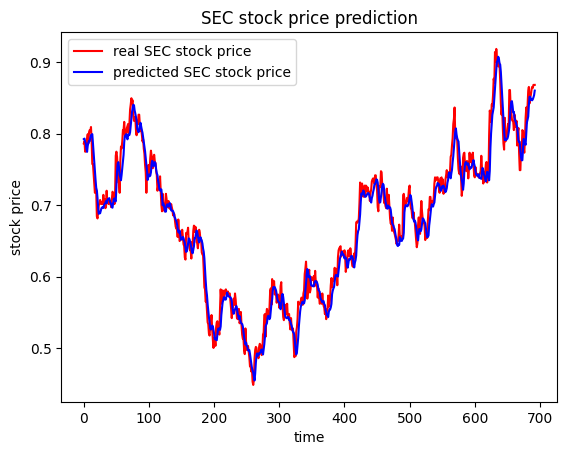

오늘 예상되는 삼성전자 주가 : [81047.69928185] KRW


In [37]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print("오늘 예상되는 삼성전자 주가 :", df.Close[-1] * pred_y[-1] / dfy.Close[-1], 'KRW')

뭔가 실제값과 꽤나 큰 차이가 보임;;

https://wikidocs.net/173005 이 주소 참고해서 다시 확인할 필요 있어보임